# Rainfall_Prediction-Weather_Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.

Problem Statement:

 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [481]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# EDA:

In [482]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Columns:
    
    1. Date
    2. Location
    3. MinTemp
    4. MaxTemp
    5. Rainfall
    6. Evaporation
    7. Sunshine
    8. WindGustDir
    9. WindGustSpeed
    10. WindDir9am
    11. WindDir3pm
    12. WindSpeed9am
    13. WindSpeed3pm
    14. Humidity9am
    15. Humidity3pm
    16. Temp9am
    17. Temp3pm
    18. Pressure9am
    19. Pressure3pm
    20. Cloud9am
    21. Cloud3pm
    22. RainToday
    23. RainTomorrow

In [483]:
df.shape

(8425, 23)

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [485]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Here we have more null values in our dataset

unique values:

In [486]:
collist = df.columns.values

for i in collist:
    print(f"unique value of {i} is {df[i].unique()}\n")

unique value of Date is ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']

unique value of Location is ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']

unique value of MinTemp is [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4

Replacing all null values with its mean for float datatype

In [487]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

Replacing nan values in object datatype with its mean

In [488]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [489]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now we have replaced all null values.

In [490]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Now lets convert 'Date' from object to datetime format for better analysis

In [491]:
df['Date'] = pd.to_datetime(df['Date'])

In [492]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [493]:
df['year'] = pd.to_datetime(df.Date,format="%d%m%Y").dt.year
df['month'] = pd.to_datetime(df.Date,format="%d%m%Y").dt.month
df['day'] = pd.to_datetime(df.Date,format="%d%m%Y").dt.day

In [494]:
df = df.drop(columns = 'Date',axis=1)

In [495]:
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [496]:
collist = df.columns.values

for i in collist:
    print(f"value counts of {i} is {df[i].value_counts()}\n")

value counts of Location is Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

value counts of MinTemp is  13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64

value counts of MaxTemp is 19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: MaxTemp, Length: 332, dtype: int64

value counts of Rainfall is 0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: R

# Categorical columns:

In [497]:
col = df.columns
num_col = df._get_numeric_data().columns
cat_col = list(set(col)-set(num_col))
cat_col

['WindGustDir',
 'RainTomorrow',
 'RainToday',
 'WindDir3pm',
 'Location',
 'WindDir9am']

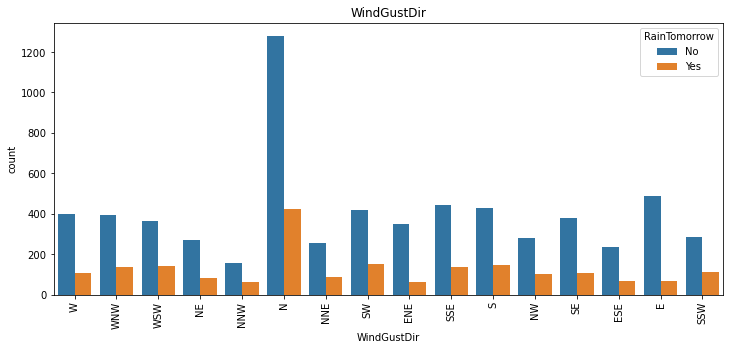

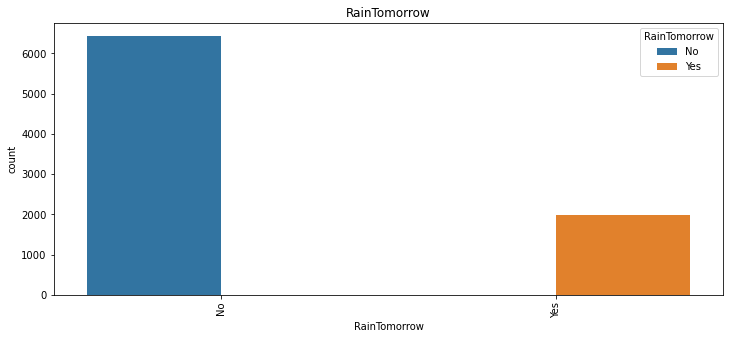

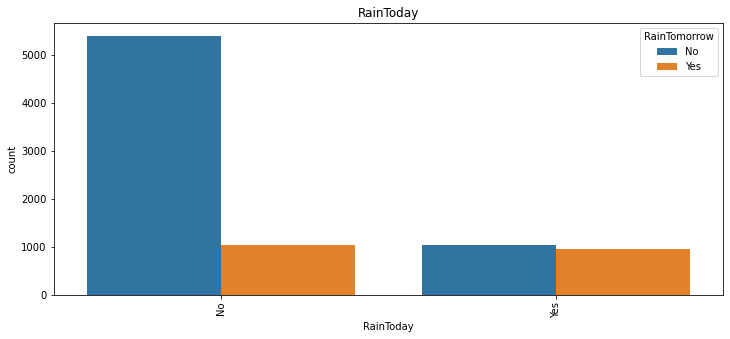

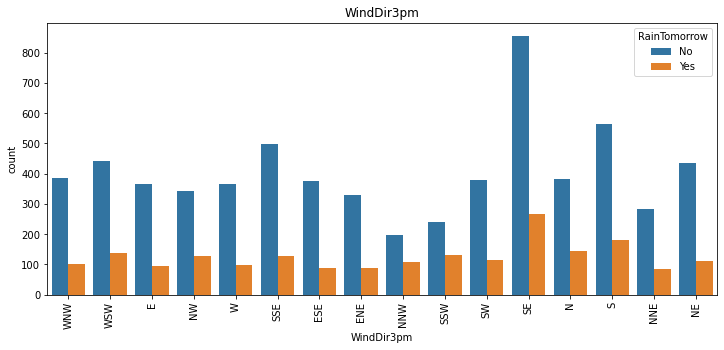

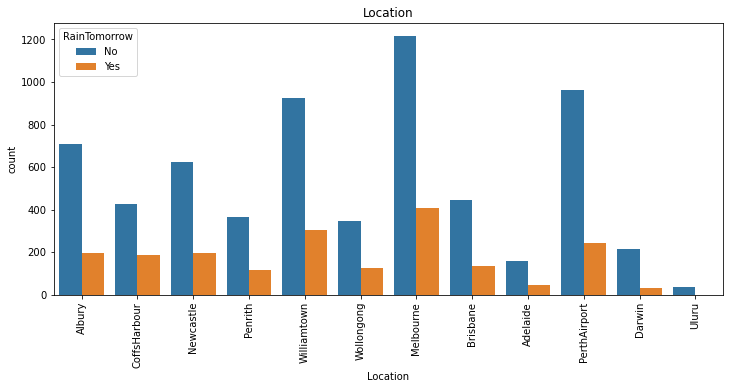

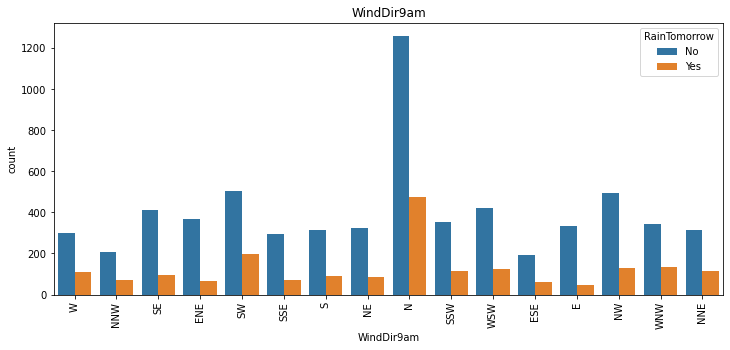

In [498]:
#Distribution plot for all categorical_columns
for i in df[cat_col]:              
    plt.figure(figsize = (12, 5))
    sns.countplot(x= df[i], hue = 'RainTomorrow',data= df)
    plt.title(i)
    plt.xticks(rotation=90);
    plt.show()

Key Observations:

1. Highest rainfall data from Melbourbne and least from Uluru
2. We can clearly see that the WindGustDir is strong towards the north, followed by the SW, SSE, S,WNW.
3. In the plots we can clearly see that the wind direction is towards the N at 9am and in the SE at 3pm
4. There is no much difference in the rainfall between today and tomorrow.

In [499]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

In [500]:
df.shape

(8425, 25)

# Convert Categorical data to numeric using label encoder

In [501]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

# Data Visualization

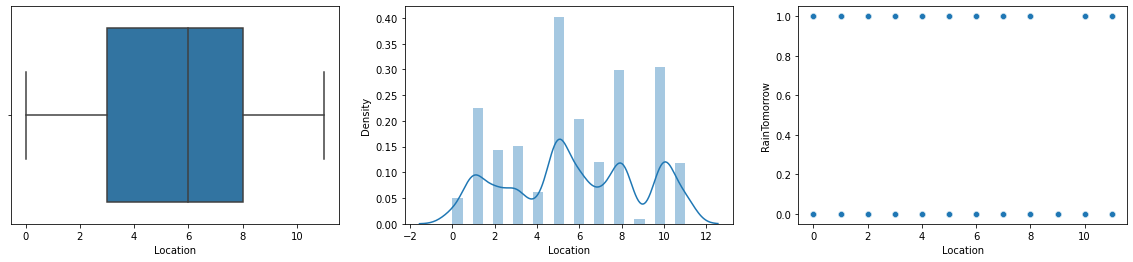

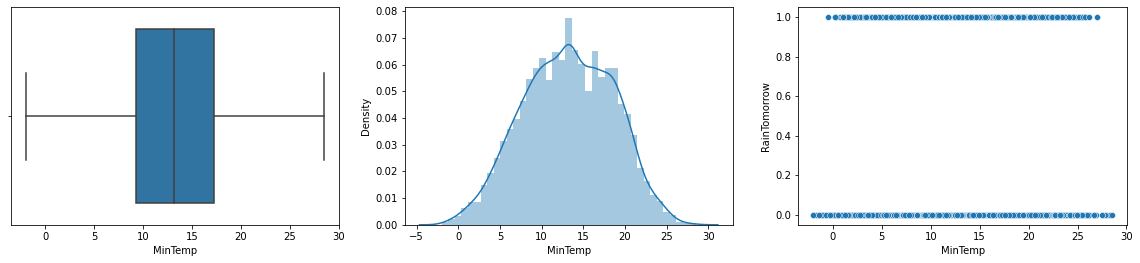

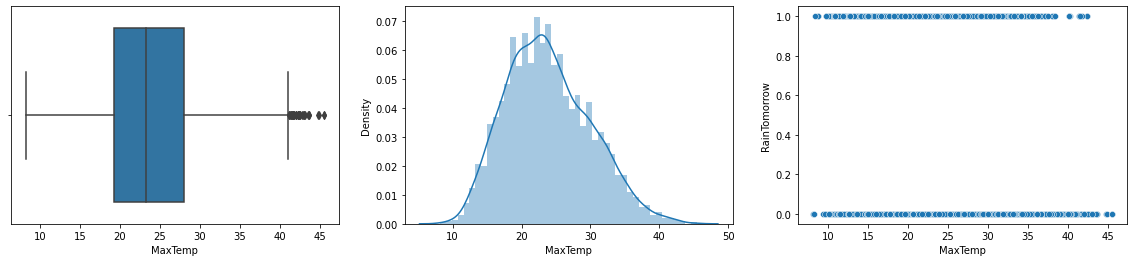

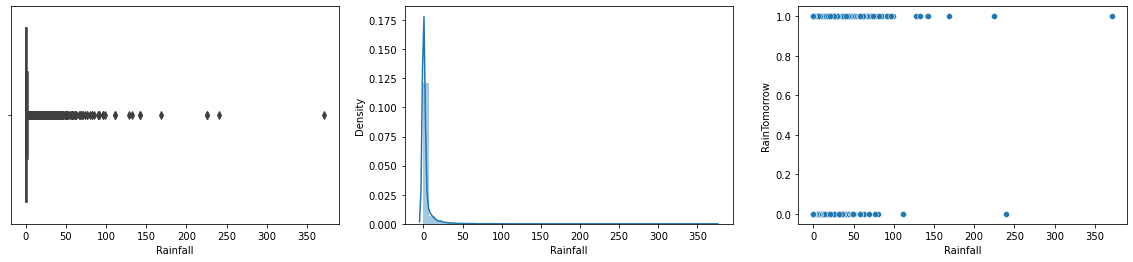

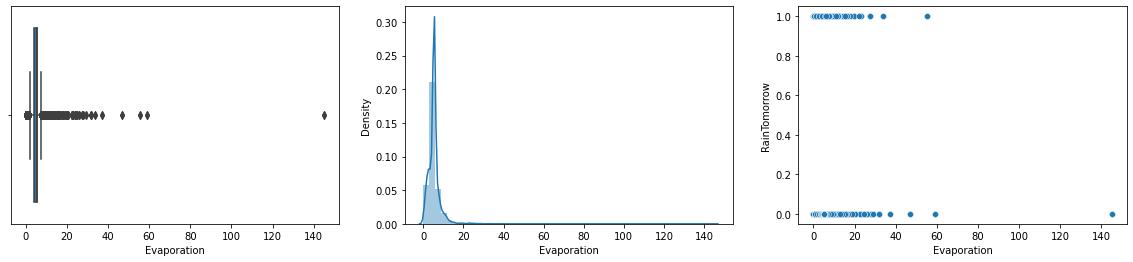

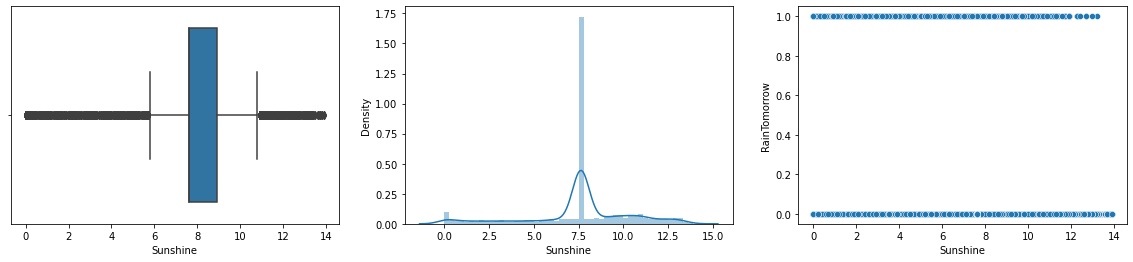

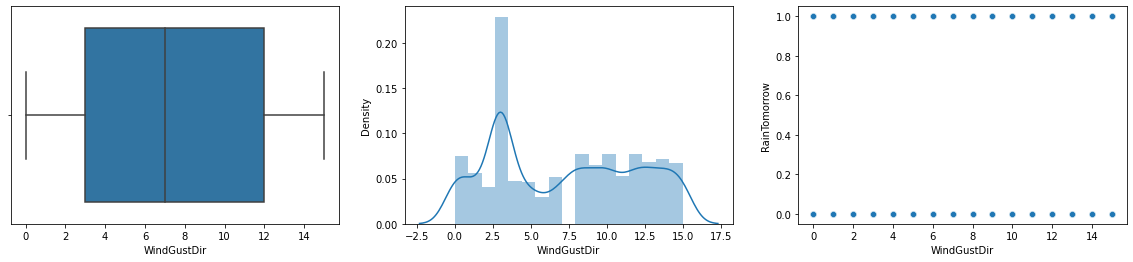

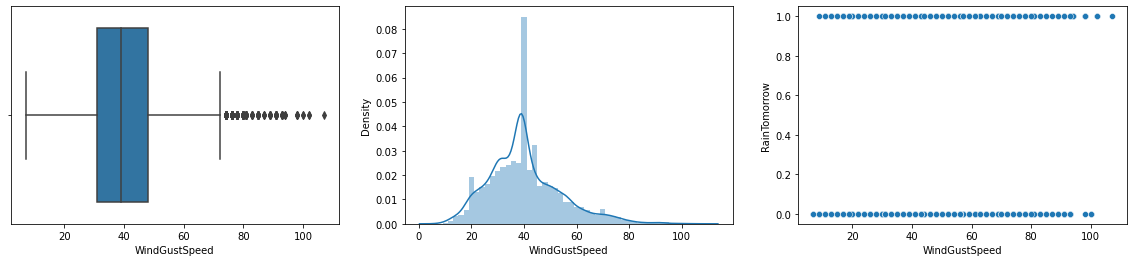

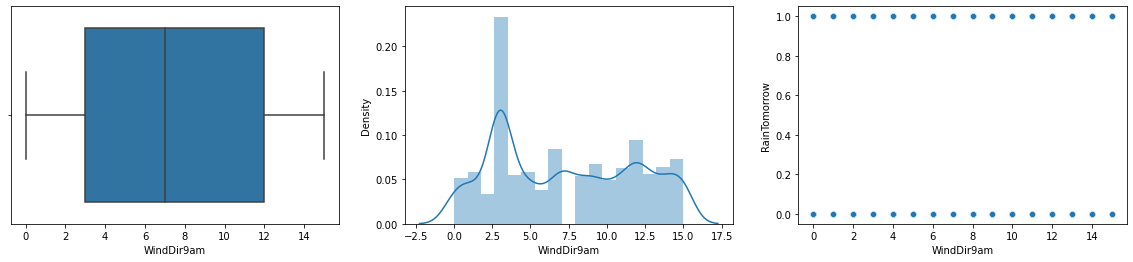

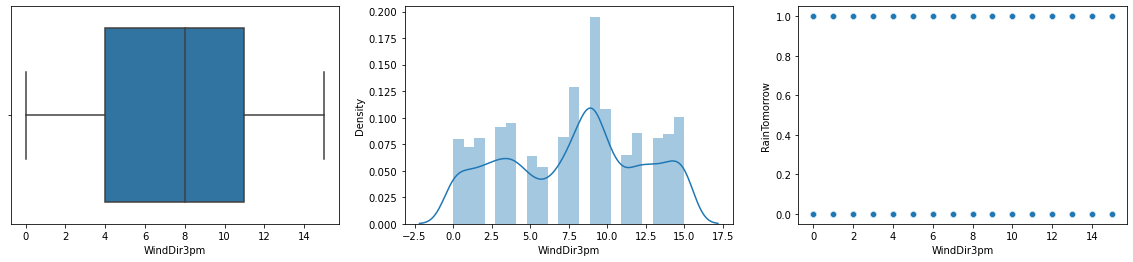

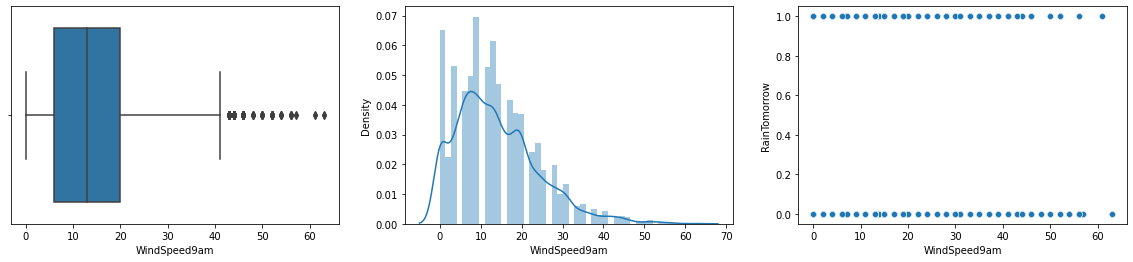

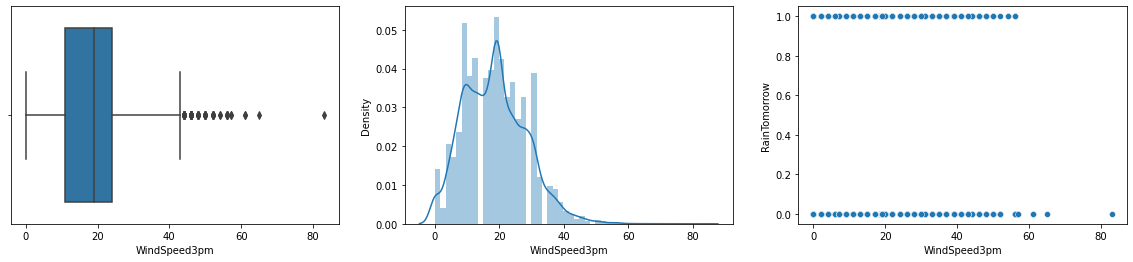

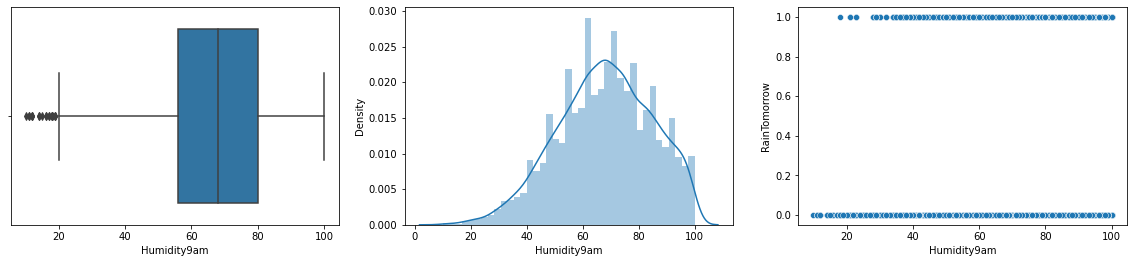

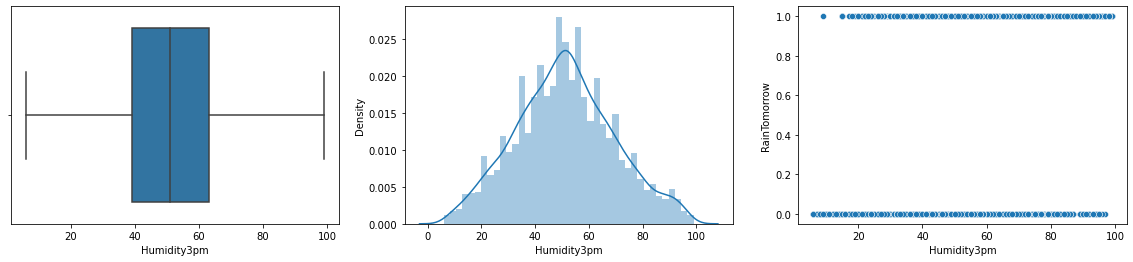

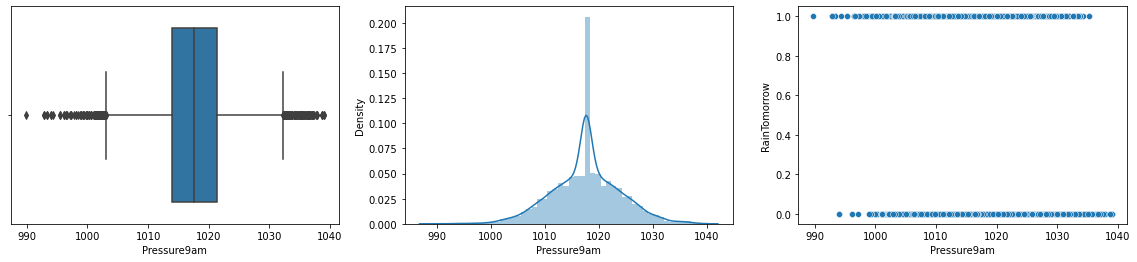

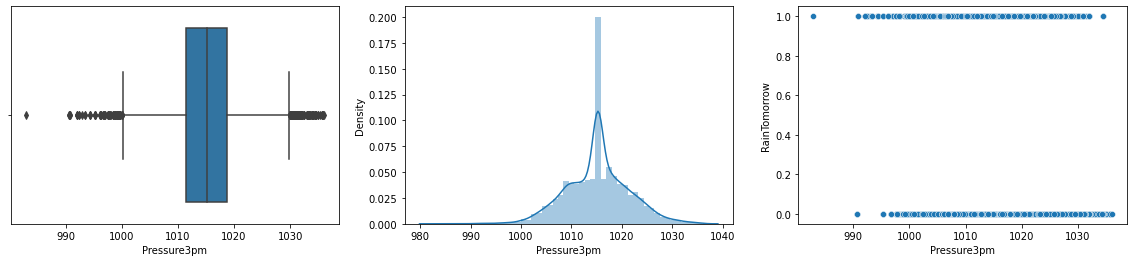

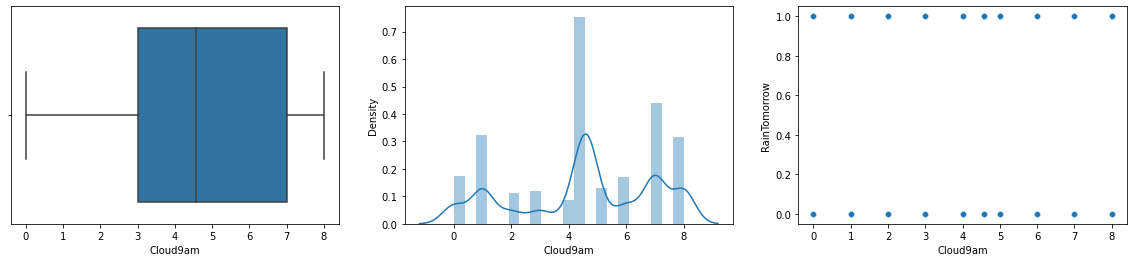

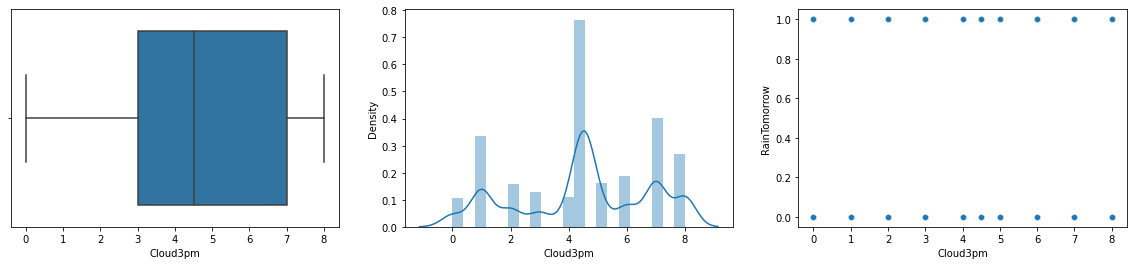

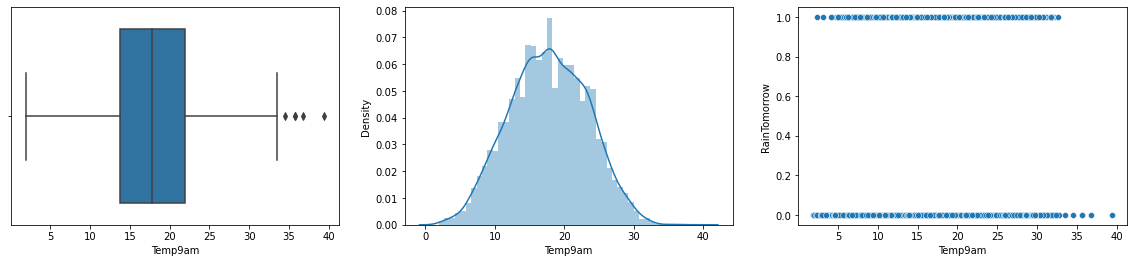

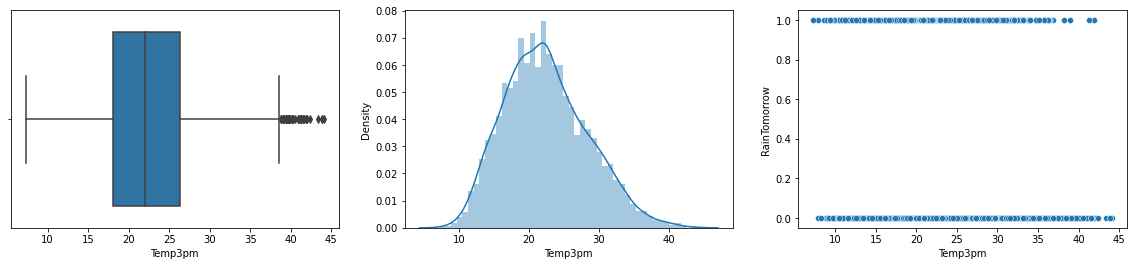

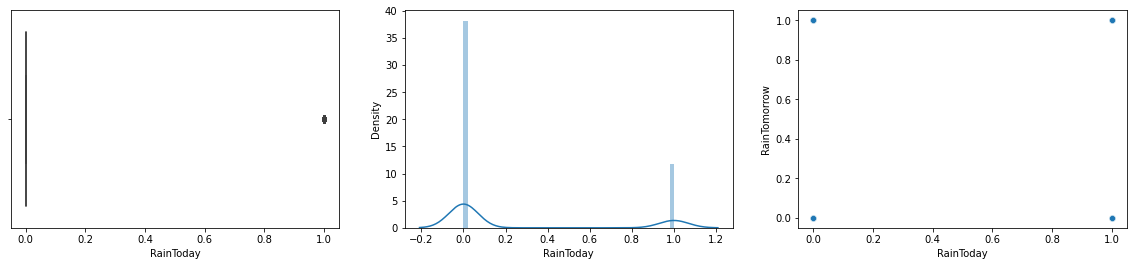

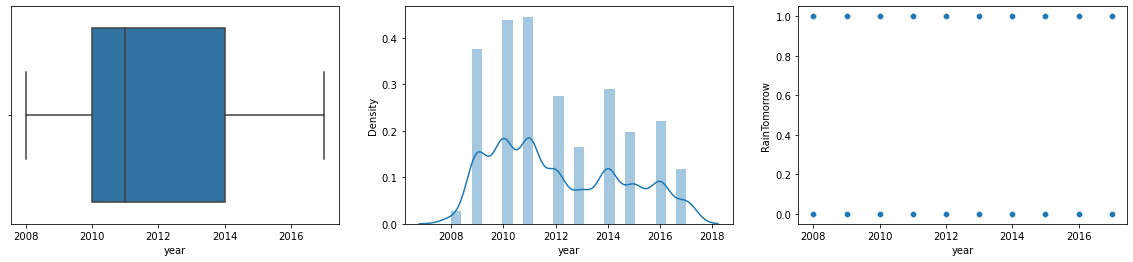

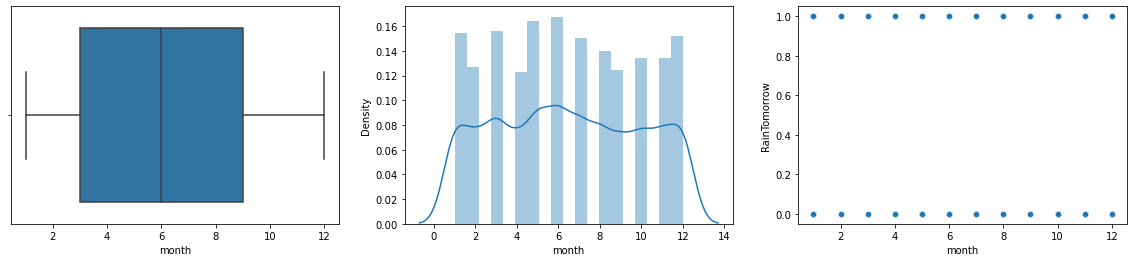

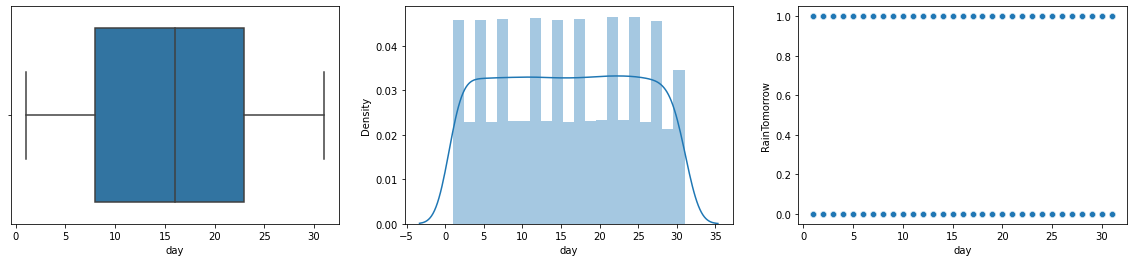

In [502]:
feature_variable = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month', 'day']
target_variable = 'RainTomorrow' 

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable)
    plt.show()
for i in feature_variable:
    num_plots(i)

    

The above visualization shows the relationship between feature and the target variable

In [503]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.036320,7.267418,7.810445,...,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320,2012.102433,6.442136,15.741958
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.781296,4.588045,4.430162,...,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846,2.473137,3.437994,8.787354
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000,1.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,...,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000,2010.000000,3.000000,8.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,39.000000,7.000000,8.000000,...,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000,2011.000000,6.000000,16.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,...,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000,2014.000000,9.000000,23.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [504]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.230018,-0.027103,-0.027736,...,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,0.486405,-0.082407,-0.002019
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230214,-0.041650,-0.147166,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.044123,-0.245854,0.009446
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139864,-0.214119,-0.180622,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.119772,-0.163253,0.015608
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.085264,0.093821,0.038560,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,0.006435,-0.012244,-0.013760
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.135438,-0.061677,-0.047952,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.152708,0.004362,0.013597
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013973,-0.076560,-0.068553,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.065374,-0.006694,0.004662
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.025577,0.403562,0.505799,...,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,-0.088340,0.034823,0.015683
WindGustSpeed,0.230018,0.230214,0.139864,0.085264,0.135438,-0.013973,0.025577,1.000000,-0.068545,0.070677,...,-0.372113,0.025104,0.079348,0.202277,0.102006,0.076890,0.190274,-0.049612,0.051063,-0.002454
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.068545,1.000000,0.249527,...,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.014498,0.012544,-0.015154
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.070677,0.249527,1.000000,...,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,-0.005812,0.029384,0.003089


# Analysis for 'RainTomorrow' as target variable

<AxesSubplot:>

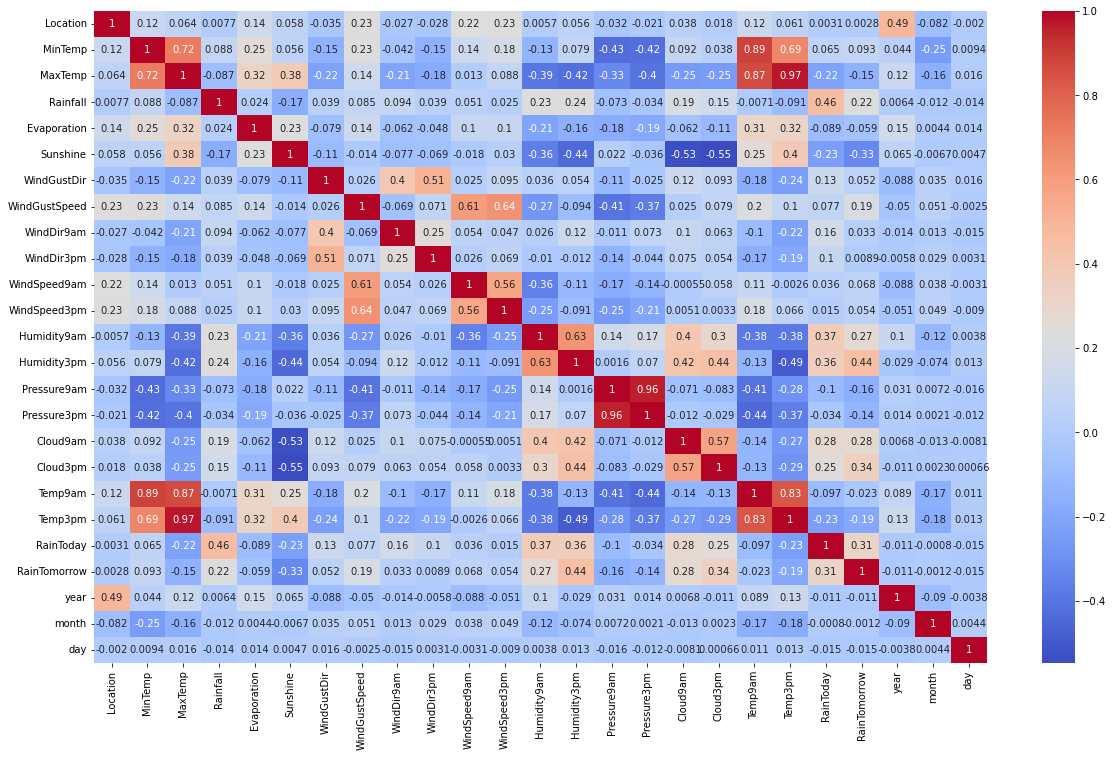

In [505]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

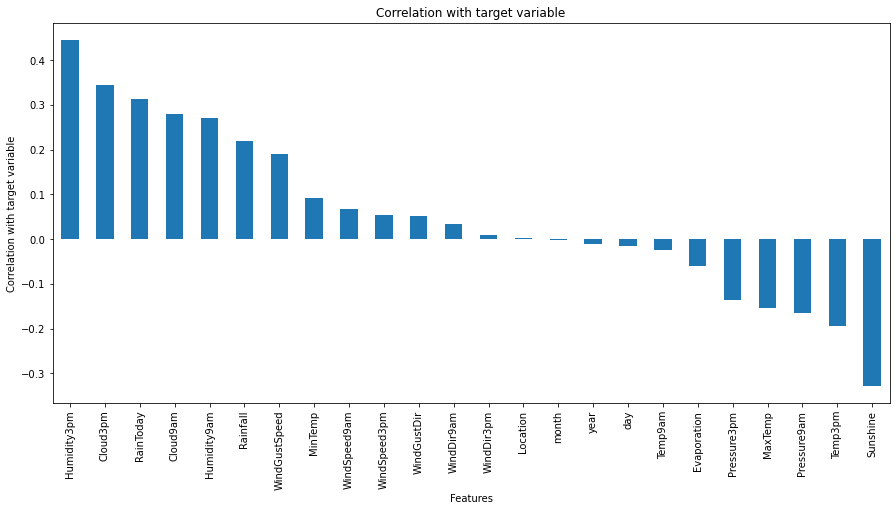

In [506]:
plt.figure(figsize=(15,7))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot.bar()
plt.xlabel("Features")
plt.ylabel("Correlation with target variable")
plt.title("Correlation with target variable")
plt.show()

Key Observations:

1. Humidity3pm is highly correlated with target variable.
2. 'Cloud3pm', 'RainToday', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'MinTemp', 'WindSpeed3am', 'WindGusDir9am', 'WindDir9am', 'Wind3pm' is positively correlated with target variable.
3. 'Sunshine', 'Pressure9am', 'MaxTemp', 'Pressure3pm', 'Evaporation', 'Temp9am' is negatively correlated with target variable.

Tomorrow Rainfall is highly based on humidity, Rainfall today

# Outliers:

Location            AxesSubplot(0.125,0.749828;0.133621x0.130172)
MinTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MaxTemp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Rainfall         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Sunshine            AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindGustDir      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindGustSpeed     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
WindDir9am       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
WindDir3pm       AxesSubplot(0.766379,0.593621;0.133621x0.130172)
WindSpeed9am        AxesSubplot(0.125,0.437414;0.133621x0.130172)
WindSpeed3pm     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Humidity9am       AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Humidity3pm      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Pressure9am      AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Pressure3p

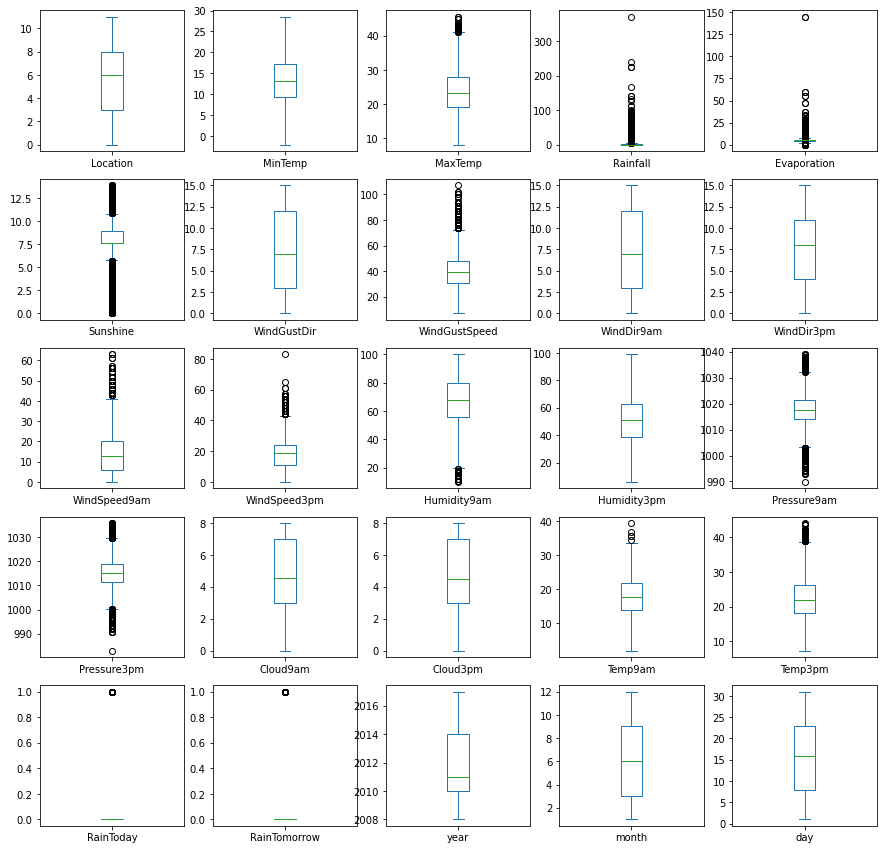

In [507]:
df.plot(kind='box',subplots='True',figsize=(15,15),layout=(5,5))

Key Observations:

1. Outliers are present in 'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3am', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm'

# Remove Outliers:

In [508]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [509]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
x_new = x[(z<3).all(axis=1)]

In [510]:
print("Old DataFrame : ",x.shape[0])
print("New DataFrame : ",x_new.shape[0])
print("Rows Dropped : ",x.shape[0] - x_new.shape[0])

Old DataFrame :  8425
New DataFrame :  7987
Rows Dropped :  438


In [511]:
percentage_loss = (8425-7987)/8425*100
percentage_loss

5.198813056379822

There is 5% data loss which is less. We can drop the rows with outliers

# Skewness

In [512]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

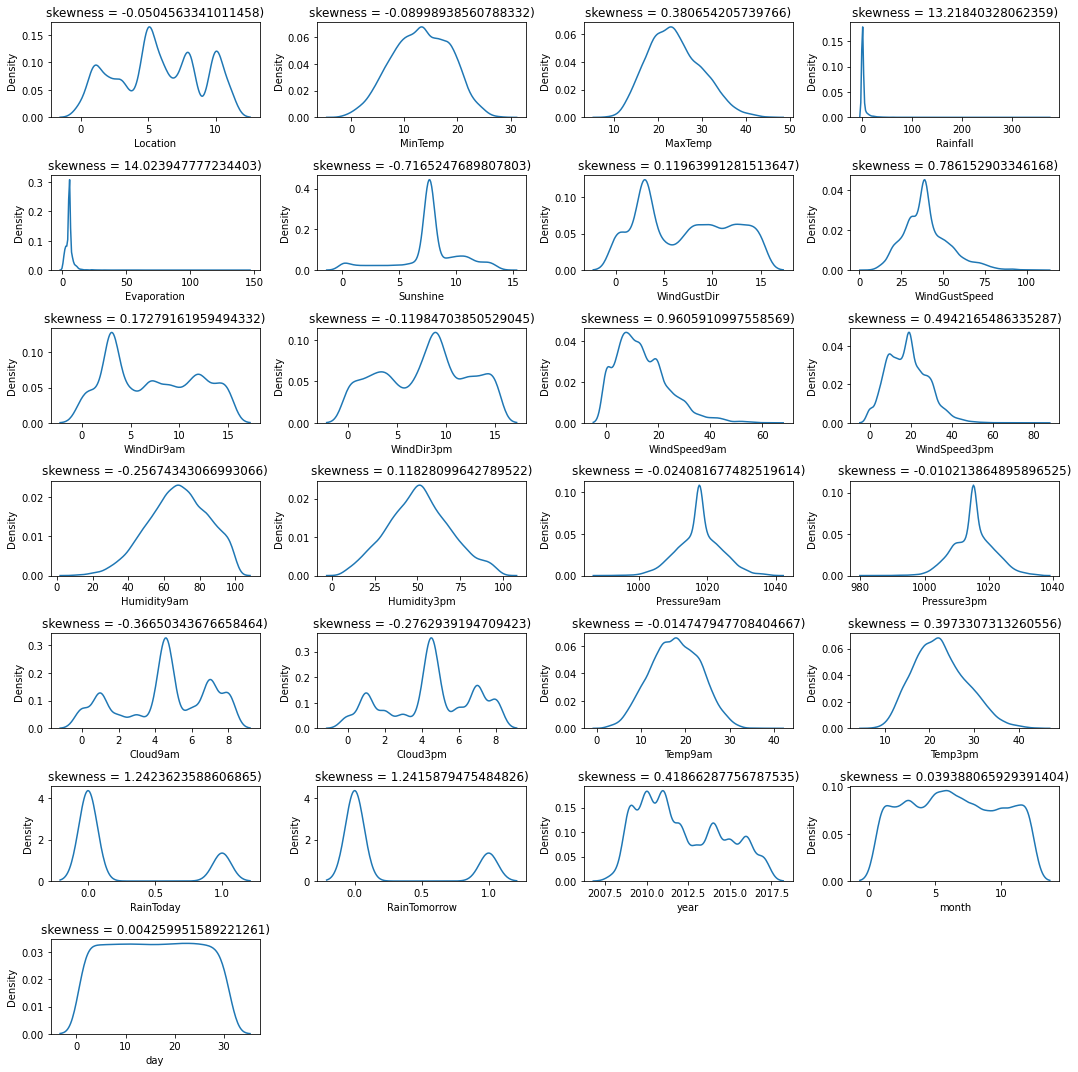

In [513]:
collist = df.columns.values
plt.figure(figsize=(15,15))
for i in range(0,len(collist)):
    plt.subplot(7,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {df[collist[i]].skew()})")
    plt.tight_layout()
    

Key Observations:

Keeping +/- 0.5 as skew value, Skewness is present in 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'RainToday', 'RainTommorow'

# Remove Skewness using power transform

In [514]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [515]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

16   -0.282006
9    -0.248689
17   -0.220610
23   -0.211250
6    -0.187177
0    -0.186657
22   -0.155749
8    -0.155025
1    -0.102983
10   -0.079333
5    -0.075544
12   -0.067235
18   -0.048994
13   -0.038753
11   -0.037553
2    -0.010591
19   -0.009893
21    0.000000
15    0.001772
14    0.002514
7     0.010481
4     0.080305
3     0.904387
20    1.242362
dtype: float64

In [516]:
x = pd.DataFrame((x_new),columns=x.columns)

# Standard Scaling

In [517]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

# MultiColinearity

In [518]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.577741,Location
1,8.658169,MinTemp
2,26.800314,MaxTemp
3,5.208056,Rainfall
4,1.484884,Evaporation
5,2.006918,Sunshine
6,1.598772,WindGustDir
7,2.329980,WindGustSpeed
8,1.344429,WindDir9am
9,1.485497,WindDir3pm


'Temp3am' has high vif value so we can drop it

In [519]:
x.drop(['Temp3pm'],axis=1,inplace=True)

In [520]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.574610,Location
1,8.607138,MinTemp
2,10.059089,MaxTemp
3,5.207612,Rainfall
4,1.483537,Evaporation
5,2.006863,Sunshine
6,1.596653,WindGustDir
7,2.305313,WindGustSpeed
8,1.344381,WindDir9am
9,1.482620,WindDir3pm


'Pressure9am' has high vif value we can drop it

In [521]:
x.drop(['Pressure9am'],axis=1,inplace=True)

In [522]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.573953,Location
1,8.480461,MinTemp
2,9.656731,MaxTemp
3,5.173515,Rainfall
4,1.467094,Evaporation
5,2.001027,Sunshine
6,1.584318,WindGustDir
7,2.286089,WindGustSpeed
8,1.320866,WindDir9am
9,1.406784,WindDir3pm


'Temp9am' has high vif value so we can drop it

In [523]:
x.drop(['Temp9am'],axis=1,inplace=True)

In [524]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.573766,Location
1,4.699241,MinTemp
2,5.564472,MaxTemp
3,5.170336,Rainfall
4,1.465283,Evaporation
5,1.994987,Sunshine
6,1.583779,WindGustDir
7,2.256642,WindGustSpeed
8,1.320698,WindDir9am
9,1.406777,WindDir3pm


Now we have all values less than 10, no need to drop any columns further.

# Balancing target variable

In [525]:
y.value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [526]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [527]:
y.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

# Training the dataset

In [528]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [529]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=.30)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy_score : ",acc*100,"Random_State : ",best_rstate)

Accuracy_score :  79.56487956487956 Random_State :  821


In [530]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=637,test_size=.30)

In [531]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


In [532]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

model = [lr,kn,dtc,gnb,svc,rfc,ada,gbc]

In [533]:
mean_squared_err = []
mean_absolute_err = []
r2 = []
for m in model:
    m.fit(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m," is ",accuracy_score(y_test,predm))
    print("Mean Squared error is ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error is ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("Confusion Matrix is \n",confusion_matrix(y_test,predm))
    print("Classification Report is",classification_report(y_test,predm))
    print("\n\n")

Accuracy Score of  LogisticRegression()  is  0.790986790986791
Mean Squared error is  0.20901320901320902
Mean Absolute Error is  0.20901320901320902
R2 Score is 0.16378959606325927
Confusion Matrix is 
 [[1571  386]
 [ 421 1483]]
Classification Report is               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1957
           1       0.79      0.78      0.79      1904

    accuracy                           0.79      3861
   macro avg       0.79      0.79      0.79      3861
weighted avg       0.79      0.79      0.79      3861




Accuracy Score of  KNeighborsClassifier()  is  0.8648018648018648
Mean Squared error is  0.1351981351981352
Mean Absolute Error is  0.1351981351981352
R2 Score is 0.4591055379740041
Confusion Matrix is 
 [[1520  437]
 [  85 1819]]
Classification Report is               precision    recall  f1-score   support

           0       0.95      0.78      0.85      1957
           1       0.81      0.96      0.87      

Here we have RandomForestClassifier with 93% accuracy

Further we can conform accuracy with Cross Validation

In [534]:
from sklearn.model_selection import cross_val_score,cross_val_predict

std = []
mean = []

for m in model:
    CV = cross_val_score(m,x,y,cv=5)
    print("Score of ",m," is", CV)
    print("Mean is",CV.mean())
    mean.append(CV.mean())
    print("Standard Deviation is ", CV.std())
    std.append(CV.std())
    print('\n')

Score of  LogisticRegression()  is [0.70590521 0.65501166 0.66511267 0.73727167 0.82938204]
Mean is 0.7185366475300404
Standard Deviation is  0.06274839096281681


Score of  KNeighborsClassifier()  is [0.6969697  0.65734266 0.77738928 0.78274388 0.74815391]
Mean is 0.7325198832777535
Standard Deviation is  0.048364379369203195


Score of  DecisionTreeClassifier()  is [0.59246309 0.63286713 0.84537685 0.83093665 0.65798679]
Mean is 0.7119261012770536
Standard Deviation is  0.10526518177994841


Score of  GaussianNB()  is [0.73504274 0.69230769 0.63986014 0.69179946 0.79479207]
Mean is 0.7107604189220978
Standard Deviation is  0.05172585489461791


Score of  SVC()  is [0.6958042  0.66550117 0.74708625 0.78429848 0.80528566]
Mean is 0.7395951502830632
Standard Deviation is  0.05249250190162434


Score of  RandomForestClassifier()  is [0.66317016 0.65889666 0.88111888 0.89389817 0.83249126]
Mean is 0.7859150263736352
Standard Deviation is  0.10401292824571745


Score of  AdaBoostClassifier

we have RandomForestClassifier with 78% accuracy, which can be further increased with Hypertuning

# Hypertuning

In [535]:
from sklearn.model_selection import GridSearchCV

In [536]:
param_grid = [{'n_estimators':[10,50,90,100],
              'criterion':['gini','entropy'],
              'max_features':['auto','log2','sqrt']}]
rf = RandomForestClassifier(random_state=45,n_jobs=-1)

In [537]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [538]:
rf_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=45),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'log2', 'sqrt'],
                          'n_estimators': [10, 50, 90, 100]}])

In [539]:
rf_random.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [540]:
rf_random.best_score_

0.9142900016700549

In [541]:
preds = cross_val_predict(rf_random.best_estimator_,x_train,y_train,cv=5,n_jobs=-1)

In [542]:
preds

array([0, 1, 0, ..., 0, 0, 0])

we have improved accuracy by hypertuning to 91%

# AUC-ROC Curve

In [543]:
from sklearn.metrics import roc_curve,roc_auc_score

In [544]:
y_pred_proba = rf_random.predict_proba(x_test)[:,-1]

In [545]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

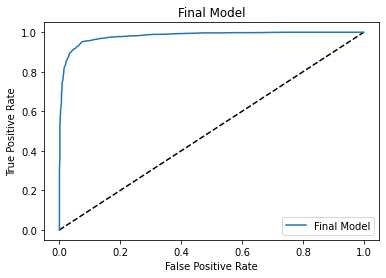

In [546]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Final Model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final Model")
plt.legend(loc='lower right')
plt.show()

In [547]:
auc_score = roc_auc_score(y_test,rf_random.predict(x_test))
print(auc_score)

0.9354932251388036


we have roc_auc_score at 93%

# Saving best model

In [548]:
import joblib
joblib.dump(preds,"Predicting will it rain tomorrow.obj")

['Predicting will it rain tomorrow.obj']

# Analysis for 'Rainfall' as target variable

In [549]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.230018,-0.027103,-0.027736,...,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824,0.486405,-0.082407,-0.002019
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230214,-0.041650,-0.147166,...,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942,0.044123,-0.245854,0.009446
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139864,-0.214119,-0.180622,...,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886,0.119772,-0.163253,0.015608
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.085264,0.093821,0.038560,...,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021,0.006435,-0.012244,-0.013760
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.135438,-0.061677,-0.047952,...,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012,0.152708,0.004362,0.013597
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013973,-0.076560,-0.068553,...,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731,0.065374,-0.006694,0.004662
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.025577,0.403562,0.505799,...,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832,-0.088340,0.034823,0.015683
WindGustSpeed,0.230018,0.230214,0.139864,0.085264,0.135438,-0.013973,0.025577,1.000000,-0.068545,0.070677,...,-0.372113,0.025104,0.079348,0.202277,0.102006,0.076890,0.190274,-0.049612,0.051063,-0.002454
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.068545,1.000000,0.249527,...,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860,-0.014498,0.012544,-0.015154
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.070677,0.249527,1.000000,...,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918,-0.005812,0.029384,0.003089


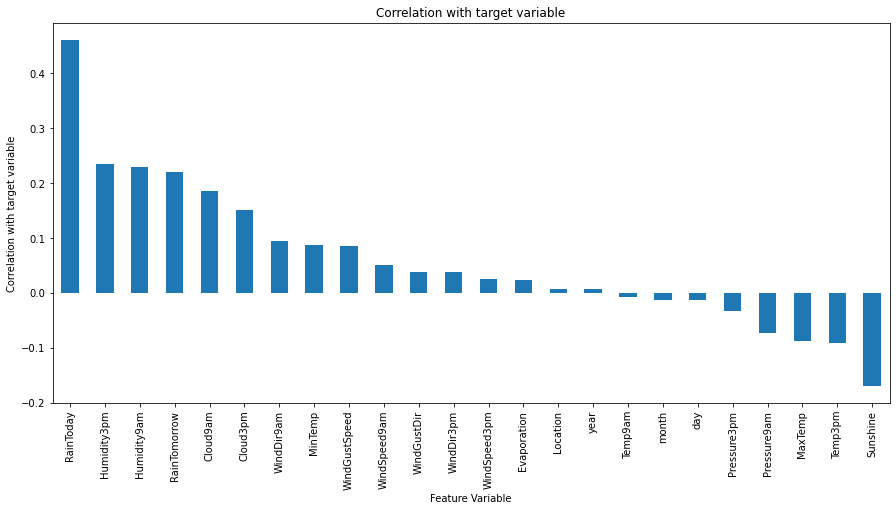

In [550]:
plt.figure(figsize=(15,7))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot.bar()
plt.xlabel('Feature Variable')
plt.ylabel("Correlation with target variable")
plt.title("Correlation with target variable")
plt.show()

Key Observations:

1. 'RainToday' is highly correlated with target variable.
2. 'Humidity3pm', 'Humidity9am', 'RainTomorrow', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'MinTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindGustDir', 'WindDir3pm' are positively correlated with Target Variable.
3. 'Sunshine', 'Temp3pm', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Day', 'Month', 'year' is negatively correlated with target variable.

Rainfall prediction will mostly be checked by 'RainToday' and 'Sunshine' don't have much role to play here.

In [551]:
x1 = df.drop(['Rainfall'],axis=1)
y1 = df['Rainfall']

# outliers:

Location            AxesSubplot(0.125,0.749828;0.133621x0.130172)
MinTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
MaxTemp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Sunshine         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
WindGustDir         AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindGustSpeed    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindDir9am        AxesSubplot(0.44569,0.593621;0.133621x0.130172)
WindDir3pm       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
WindSpeed9am     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
WindSpeed3pm        AxesSubplot(0.125,0.437414;0.133621x0.130172)
Humidity9am      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Humidity3pm       AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Pressure9am      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Pressure3pm      AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Cloud9am  

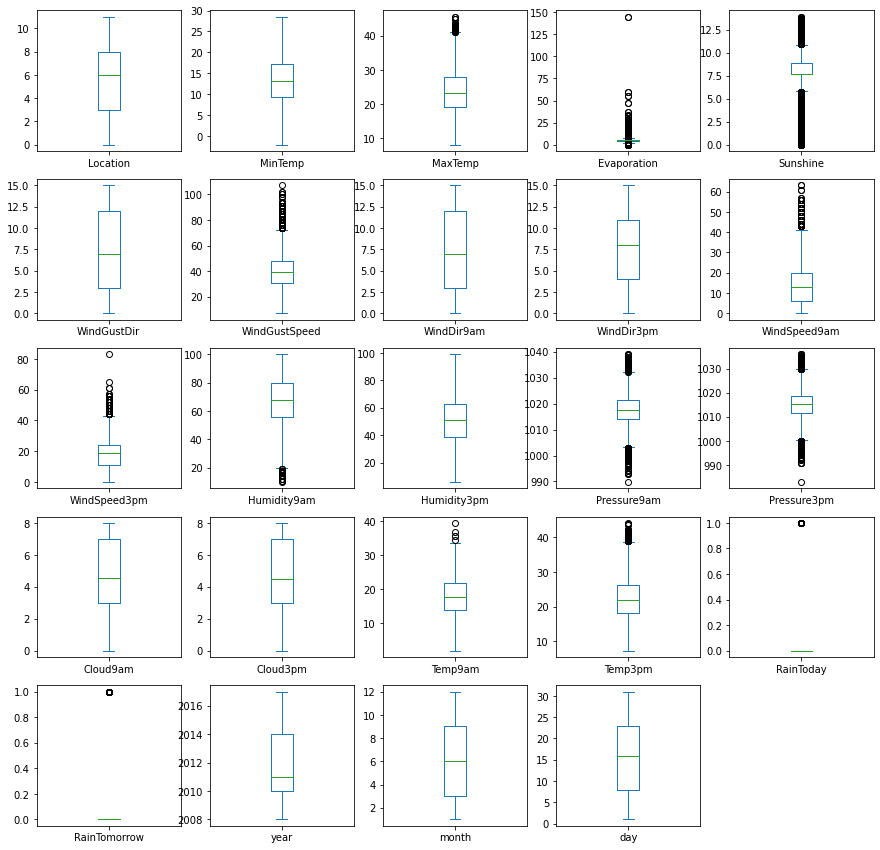

In [552]:
x1.plot(kind='box',subplots='True',layout=(5,5),figsize=(15,15))

# Key Observations:

Outliers are present in 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WinsSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'

# Removing Outliers

In [553]:
x1.shape

(8425, 24)

In [554]:
from scipy.stats import zscore
z = np.abs(zscore(x1))
threshold = 3
x1_new = x1[(z<3).all(axis=1)]

In [555]:
print("Old DataFrame : ", x1.shape)
print("New DataFrame : ",x1_new.shape)
print("Rows Dropped : ", x1.shape[0] - x1_new.shape[0])

Old DataFrame :  (8425, 24)
New DataFrame :  (8095, 24)
Rows Dropped :  330


In [556]:
percentage_loss = (8095-7860)/8095*100
percentage_loss

2.9030265596046942

# Skewness:

In [557]:
x1.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
year              0.418663
month             0.039388
day               0.004260
dtype: float64

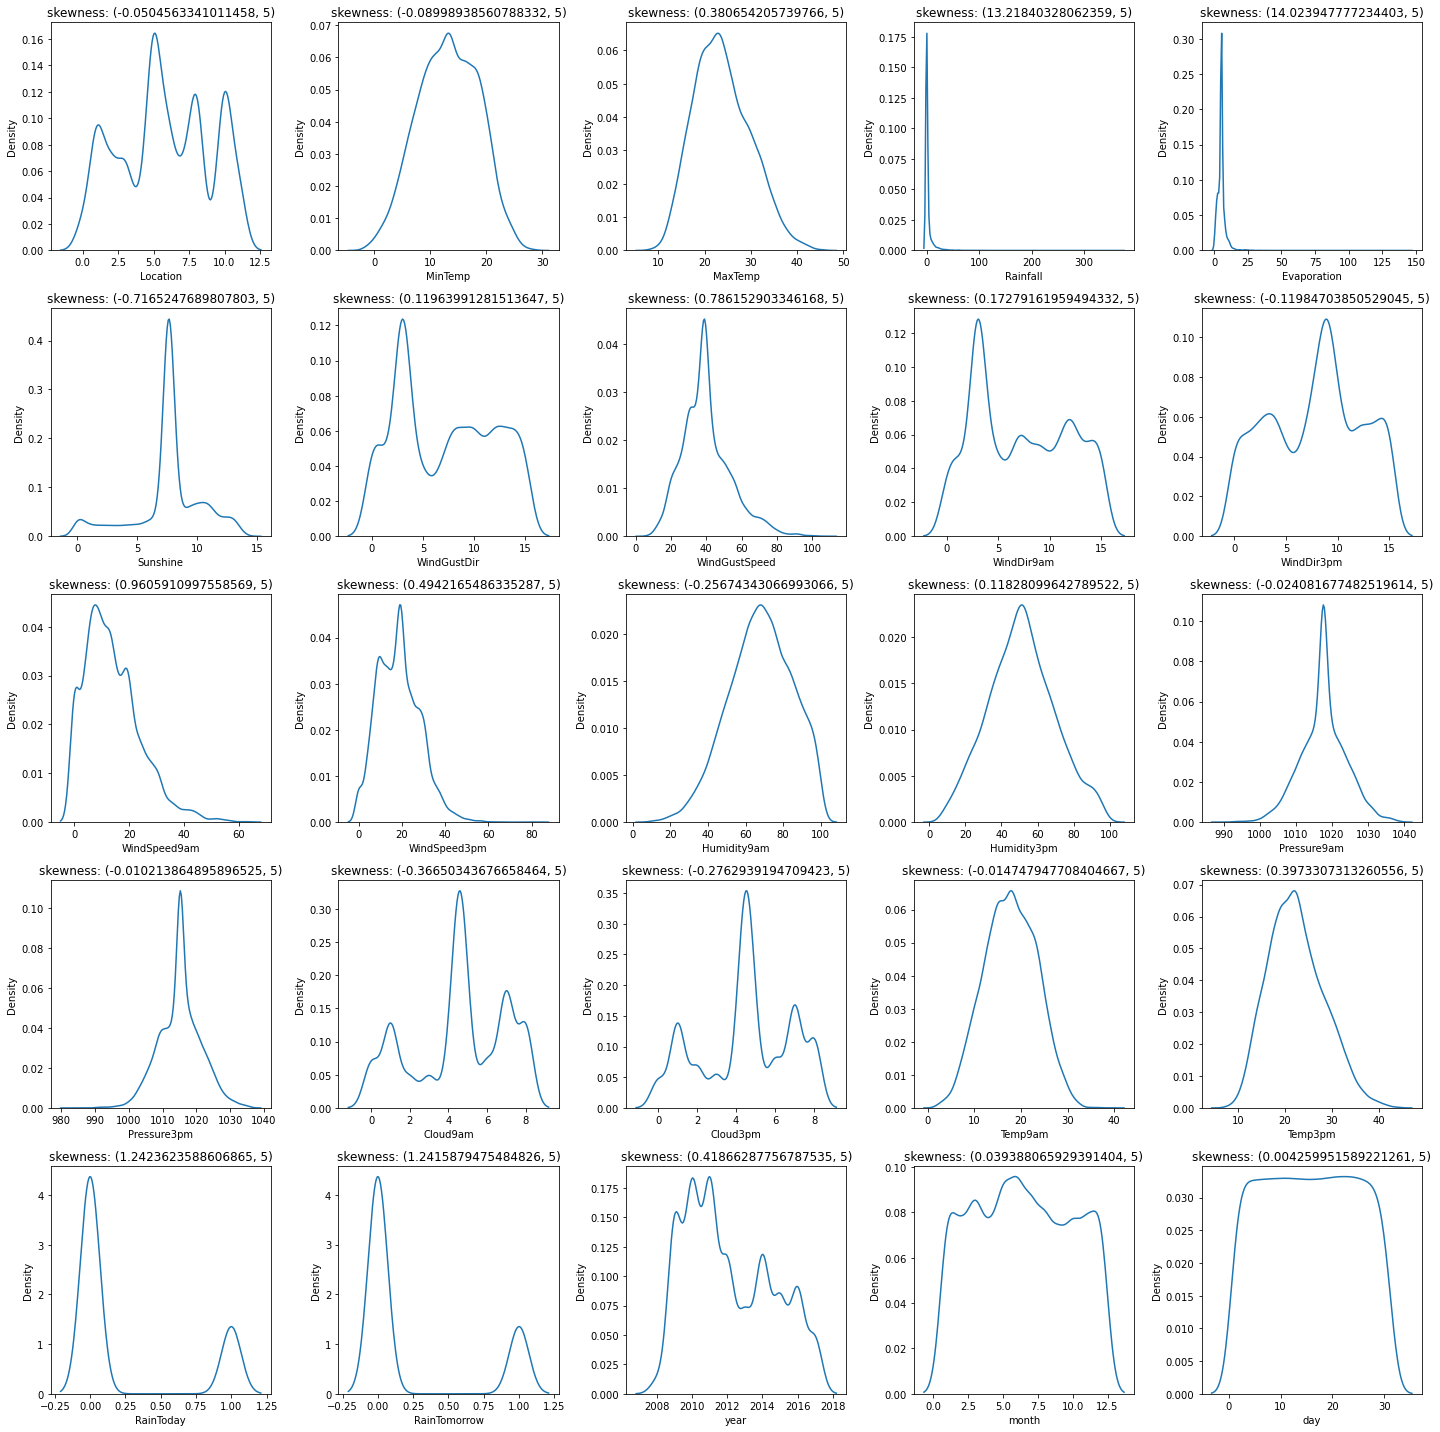

In [558]:
collist = df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(5,5,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness: {df[collist[i]].skew(),5}")
    plt.tight_layout()

Key Observation:

Keeping +/-0.5 as skew value. Skewness is present in 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'RainToday','RainTomorrow' columns.

# Remove Skewness by power_transform

In [559]:
from sklearn.preprocessing import power_transform
x1_new  = power_transform(x1,method='yeo-johnson')

In [560]:
pd.DataFrame(x1_new).skew().sort_values(ascending=True)

15   -0.282006
8    -0.248689
16   -0.220610
23   -0.211250
5    -0.187177
0    -0.186657
22   -0.155749
7    -0.155025
1    -0.102983
9    -0.079333
4    -0.075544
11   -0.067235
17   -0.048994
12   -0.038753
10   -0.037553
2    -0.010591
18   -0.009893
21    0.000000
14    0.001772
13    0.002514
6     0.010481
3     0.080305
20    1.241588
19    1.242362
dtype: float64

In [561]:
x1 = pd.DataFrame((x1_new),columns=x1.columns)

In [562]:
x1.shape

(8425, 24)

In [563]:
y1.shape

(8425,)

# Scaling data

In [564]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x1),columns=x1.columns)

# Multicolinearity:

In [565]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif['Features'] = x1.columns
vif

,VIF,Features
0,1.588812,Location
1,8.584509,MinTemp
2,26.805265,MaxTemp
3,1.475285,Evaporation
4,2.025207,Sunshine
5,1.598855,WindGustDir
6,2.400818,WindGustSpeed
7,1.344421,WindDir9am
8,1.486292,WindDir3pm
9,2.029659,WindSpeed9am


'Temp3am' has high vif value which can be dropped

In [566]:
x1.drop(['Temp3pm'],axis=1,inplace=True)

In [567]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif['Features'] = x1.columns
vif

,VIF,Features
0,1.585871,Location
1,8.532988,MinTemp
2,10.057694,MaxTemp
3,1.473980,Evaporation
4,2.025116,Sunshine
5,1.596816,WindGustDir
6,2.377619,WindGustSpeed
7,1.344372,WindDir9am
8,1.483378,WindDir3pm
9,2.028934,WindSpeed9am


'Pressure9m' has high vif value which can be dropped

In [568]:
x1.drop(['Pressure9am'],axis=1,inplace=True)

In [569]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif['Features'] = x1.columns
vif

,VIF,Features
0,1.585491,Location
1,8.392304,MinTemp
2,9.649221,MaxTemp
3,1.459219,Evaporation
4,2.018078,Sunshine
5,1.583374,WindGustDir
6,2.352814,WindGustSpeed
7,1.320621,WindDir9am
8,1.407442,WindDir3pm
9,2.023455,WindSpeed9am


'Temp9am' has high vif value which can be dropped

In [570]:
x1.drop(['Temp9am'],axis=1,inplace=True)

In [571]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif['Features'] = x1.columns
vif

,VIF,Features
0,1.585286,Location
1,4.638153,MinTemp
2,5.541134,MaxTemp
3,1.457589,Evaporation
4,2.011907,Sunshine
5,1.582889,WindGustDir
6,2.322402,WindGustSpeed
7,1.320438,WindDir9am
8,1.407430,WindDir3pm
9,2.013110,WindSpeed9am


Now we have all values less than 10. No need to drop further columns

# Value count of target variable:

In [572]:
y1.value_counts()

0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [573]:
x1.shape

(8425, 21)

In [574]:
y1.shape

(8425,)

# Training the dataset

In [575]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [577]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state=i,test_size=.30)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = r2_score(y_test,y_pred)
    if temp > acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ",acc*100,"Random State : ",best_rstate)

Accuracy Score :  37.50376935257904 Random State :  229


In [583]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [586]:
lr = LinearRegression()
la = Lasso()
ri = Ridge()
el = ElasticNet()
dtr = DecisionTreeRegressor()
kn = KNeighborsRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

model = [lr,la,ri,el,dtr,kn,svr,rfr,ada,gbr]

In [589]:
score = []
mean_squared_err = []
mean_absolute_err =[]
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m, " is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
   
    
    print("Mean Squared error : ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error : ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print('\n\n')

Accuracy Score of  LinearRegression()  is  0.2194678302962224
Mean Squared error :  54.6032115896586
Mean Absolute Error :  2.9215641391341425
R2 Score :  0.29089811963524415



Accuracy Score of  Lasso()  is  0.1908798765333718
Mean Squared error :  57.17589565927994
Mean Absolute Error :  2.5043980613513797
R2 Score :  0.2574880864477741



Accuracy Score of  Ridge()  is  0.2194678191463293
Mean Squared error :  54.60221593903964
Mean Absolute Error :  2.9212640150005664
R2 Score :  0.2909110496022834



Accuracy Score of  ElasticNet()  is  0.18182478103224375
Mean Squared error :  57.524776652312816
Mean Absolute Error :  2.6613206217841756
R2 Score :  0.25295736085525256



Accuracy Score of  DecisionTreeRegressor()  is  1.0
Mean Squared error :  58.56883962686775
Mean Absolute Error :  1.8823371664359787
R2 Score :  0.23939868917784635



Accuracy Score of  KNeighborsRegressor()  is  0.44890277803439826
Mean Squared error :  57.950252087275025
Mean Absolute Error :  2.203604891434

we have DecisionTreeRegressor with 100% accuracy followed by RandomForestRegressor with 89%. we can conform this with cross validation.


# Cross Validation:

In [593]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x1,y1,cv=5)
    print("Score of ", m ," is ", CV)
    print("Mean score is : ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(
        CV.std())
    print('\n')

Score of  LinearRegression()  is  [0.18092755 0.19973824 0.26190203 0.22950276 0.34165824]
Mean score is :  0.24274576647742951
Standard Deviation is :  0.05656351541669356


Score of  Lasso()  is  [0.14253889 0.18770069 0.23085918 0.26394557 0.31956693]
Mean score is :  0.22892225301899508
Standard Deviation is :  0.06100515577985533


Score of  Ridge()  is  [0.18091853 0.1997415  0.26190139 0.22953679 0.34166658]
Mean score is :  0.2427529587592953
Standard Deviation is :  0.056566272837822944


Score of  ElasticNet()  is  [0.13530965 0.16833438 0.21475993 0.25125423 0.32117813]
Mean score is :  0.21816726245551593
Standard Deviation is :  0.06490962332907071


Score of  DecisionTreeRegressor()  is  [-0.06052511  0.40310538  0.36423828 -0.15670672  0.25118316]
Mean score is :  0.16025899953282602
Standard Deviation is :  0.2271836275507333


Score of  KNeighborsRegressor()  is  [0.14865686 0.23541029 0.36169168 0.17637509 0.53036384]
Mean score is :  0.29049955097912034
Standard Devi

we have RandomForestRegressor with 44% accuracy, we can further increase accuracy by hypertuning

# HyperTuning

In [594]:
from sklearn.model_selection import GridSearchCV

In [595]:
param_grid = [
    {"n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
    
    }
]

rf = RandomForestRegressor(random_state=42)

In [596]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [597]:
reg_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [598]:
reg_grid.best_score_

0.40353514809207897

In [599]:
reg_grid.best_estimator_

RandomForestRegressor(max_features='sqrt', random_state=42)

In [600]:
reg_final_model = reg_grid.best_estimator_
pred = cross_val_predict(reg_final_model,x_train,y_train,cv=5,n_jobs=-1)

In [601]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [602]:
reg_final_model.score(x_train,y_train)

0.9013712339954996

After HyperTuning we get 90% accuracy.

# Saving Best Model:

In [605]:
import joblib
joblib.dump(pred,"Rainfall_Prediction.obj")

['Rainfall_Prediction.obj']

# Conclusion:

Rainfall prediction will mostly be checked by 'RainToday' and 'Sunshine' don't have much role to play here.